In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [2]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [3]:
### Центрируем данные

### Your code is here

X_centered = X - X.mean()

In [4]:
from sklearn.decomposition import PCA

### Your code is here
pca = PCA(n_components=2)

pca_dataset = pca.fit_transform(X_centered)

pca_dataset = pd.DataFrame(pca_dataset, columns=['PCA_1', 'PCA_2'])


pca_dataset.head()


,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


In [5]:
exp_var = pca.explained_variance_ratio_
print(exp_var)

[0.63176117 0.21129863]


**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


In [6]:
### Your code is here

first_component_corr = X_centered.corrwith(pca_dataset.PCA_1)
second_component_corr = X_centered.corrwith(pca_dataset.PCA_2)

corrs = pd.concat((first_component_corr, second_component_corr), axis=1)

corrs.columns = ['PCA_1', 'PCA_2']

corrs

,PCA_1,PCA_2
Trip_Distance,0.997767,0.018410
Customer_Since_Months,0.121591,0.003500
Life_Style_Index,0.480658,-0.025901
Customer_Rating,-0.070104,-0.003757
Cancellation_Last_1Month,0.000803,0.008960
Var1,-0.048532,0.998600
Var2,0.247178,-0.028448
Var3,0.293819,-0.026583
Type_of_Cab_B,-0.048751,0.005723
Type_of_Cab_C,-0.012059,-0.003397


<Axes: >

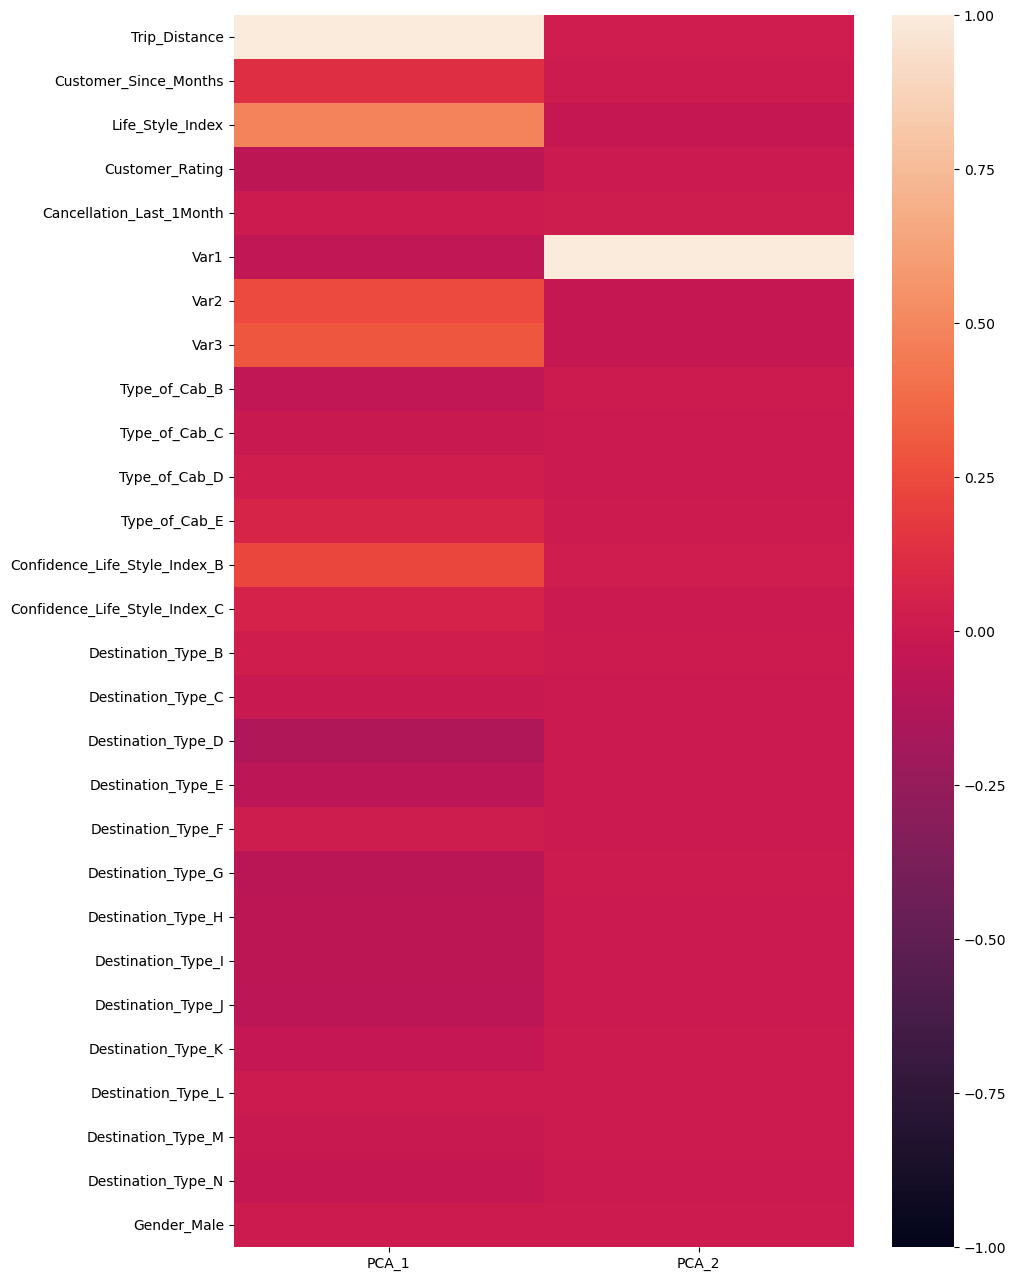

In [7]:
fig = plt.figure()

fig.set_size_inches(10, 16)

sns.heatmap(corrs,
           xticklabels=corrs.columns,
           yticklabels=corrs.index,
           vmin=-1,
           vmax=1)

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

In [8]:
### Your code is here

PCA_dataset = pd.concat((pca_dataset, y), axis=1)
PCA_dataset.columns = ['PCA_1', 'PCA_2', 'y']
PCA_dataset

,PCA_1,PCA_2,y
0,-38.743132,-23.282634,2
1,-13.209252,-25.023815,2
2,-2.004910,-1.637085,2
3,17.178458,-0.907657,3
4,14.477389,-11.656752,2
...,...,...,...
131657,-32.267779,-2.482906,3
131658,32.621206,-0.886322,2
131659,-4.045367,-1.565545,2
131660,3.696395,-15.487904,2


<Axes: xlabel='PCA_1', ylabel='PCA_2'>

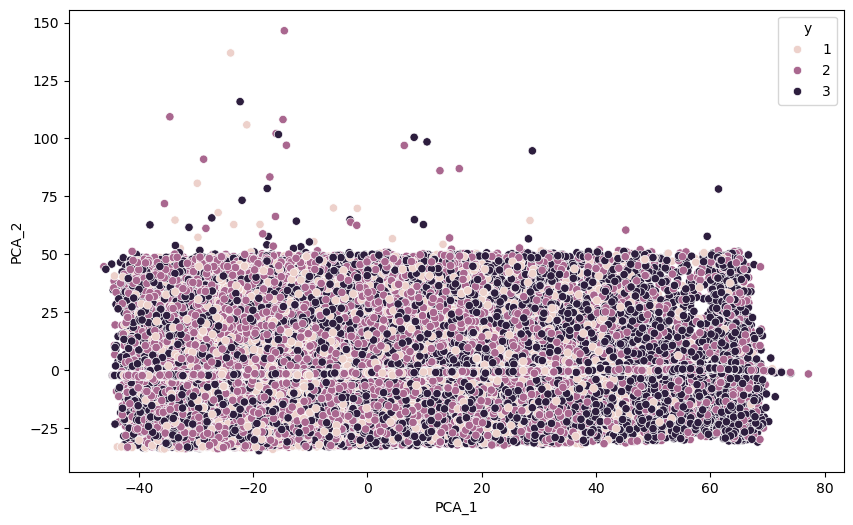

In [9]:
fig = plt.figure()

fig.set_size_inches(10, 6)

sns.scatterplot(data=PCA_dataset, x='PCA_1', y='PCA_2', hue='y')

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [10]:
pca_3d = PCA(n_components=3)

PCA_dataset_3d = pca_3d.fit_transform(X_centered)

PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3'])

PCA_dataset_3d.head()


,PCA_1,PCA_2,PCA_3
0,-38.743132,-23.282634,-11.303274
1,-13.209252,-25.023815,5.664106
2,-2.004910,-1.637085,3.663032
3,17.178458,-0.907657,-3.191676
4,14.477389,-11.656752,22.999348


In [11]:
first_component_corr3 = X_centered.corrwith(PCA_dataset_3d.PCA_1)
second_component_corr3 = X_centered.corrwith(PCA_dataset_3d.PCA_2)
third_component_corr3 = X_centered.corrwith(PCA_dataset_3d.PCA_3)

corrs_3d = pd.concat((first_component_corr3, second_component_corr3, third_component_corr3),
                    axis=1)

corrs_3d.columns = ['PCA_1', 'PCA_2', 'PCA_3']
corrs_3d

,PCA_1,PCA_2,PCA_3
Trip_Distance,0.997767,0.018410,-0.064176
Customer_Since_Months,0.121591,0.003500,0.081370
Life_Style_Index,0.480658,-0.025901,0.166688
Customer_Rating,-0.070104,-0.003757,-0.236793
Cancellation_Last_1Month,0.000803,0.008960,0.136222
Var1,-0.048532,0.998600,0.021003
Var2,0.247178,-0.028448,0.705159
Var3,0.293819,-0.026583,0.951081
Type_of_Cab_B,-0.048751,0.005723,0.011211
Type_of_Cab_C,-0.012059,-0.003397,-0.008707


<Axes: >

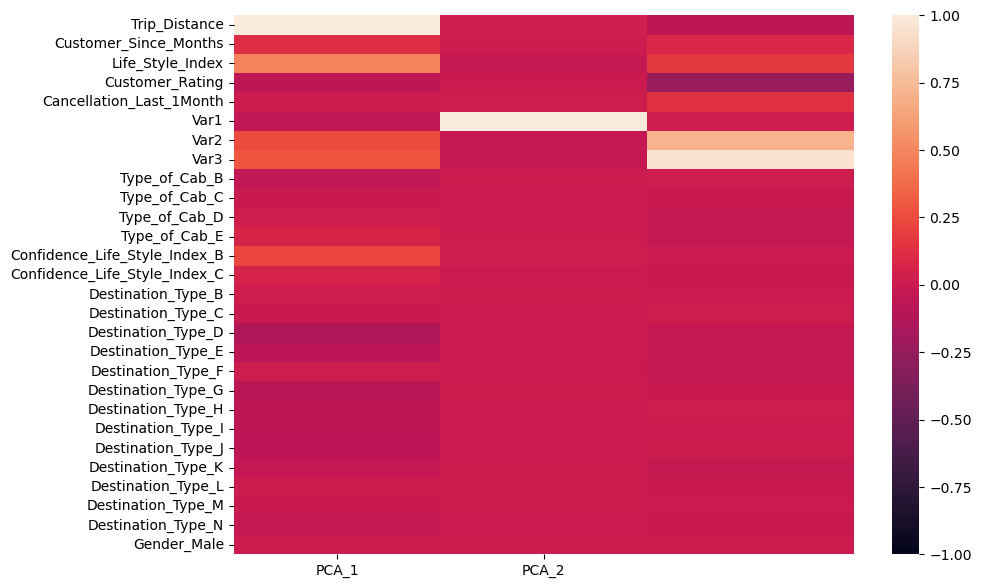

In [12]:
fig = plt.figure()

fig.set_size_inches(10, 7)

sns.heatmap(corrs_3d,
           xticklabels=corrs.columns,
           yticklabels=corrs.index,
            vmin=-1,
            vmax=1)

In [13]:
PCA_dataset_3d = pd.concat((PCA_dataset_3d, y))

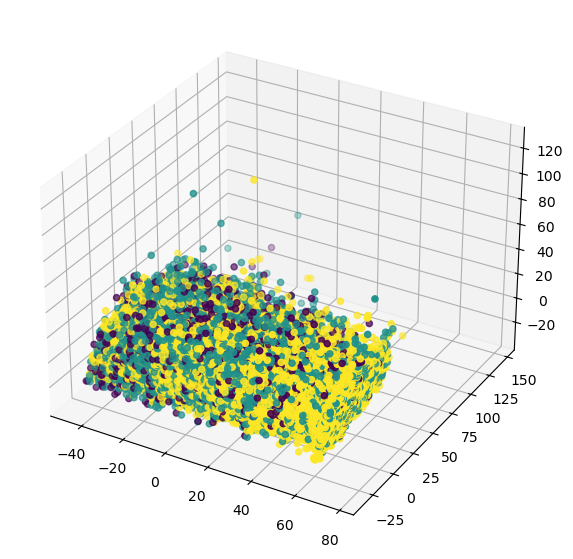

In [14]:


plt.figure(figsize=(10, 7)).add_subplot(projection='3d').scatter(PCA_dataset_3d['PCA_1'], PCA_dataset_3d['PCA_2'], PCA_dataset_3d['PCA_3'],
                                                                 c=y, cmap='viridis')
plt.show()


**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [15]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [17]:

param_grid = {'model__penalty': ['l1', 'l2', 'elasticnet'],
              'model__C': [1e-5, 0.0001, 0.001, 0.01]}

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('PCA', PCA(n_components=2)),
    ('model', LogisticRegression())
])
search = GridSearchCV(pipe, param_grid)

search.fit(X_train, y_train)

print(f'Best params : {search.best_params_}')

best_model = search.best_estimator_

print(classification_report(y_test, best_model.predict(X_test), digits=3))


Best params : {'model__C': 0.0001, 'model__penalty': 'l2'}
              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.477     0.696     0.567     11349
           3      0.495     0.503     0.499      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.355     26333
weighted avg      0.386     0.484     0.426     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [18]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [19]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    
    ### Your code is here
    accuracy, f1 = train_pca_i(n_components, X_train, y_train)
    
    accuracy_dict[n_components] = accuracy
    f1_score_dict[n_components] = f1



CPU times: user 4min 40s, sys: 1min 32s, total: 6min 13s
Wall time: 1min


In [20]:
f1_score_dict

{2: 0.42539601180945347,
 4: 0.47373121331460993,
 8: 0.5201254610241981,
 16: 0.5274627898778055,
 28: 0.6760757307801638}

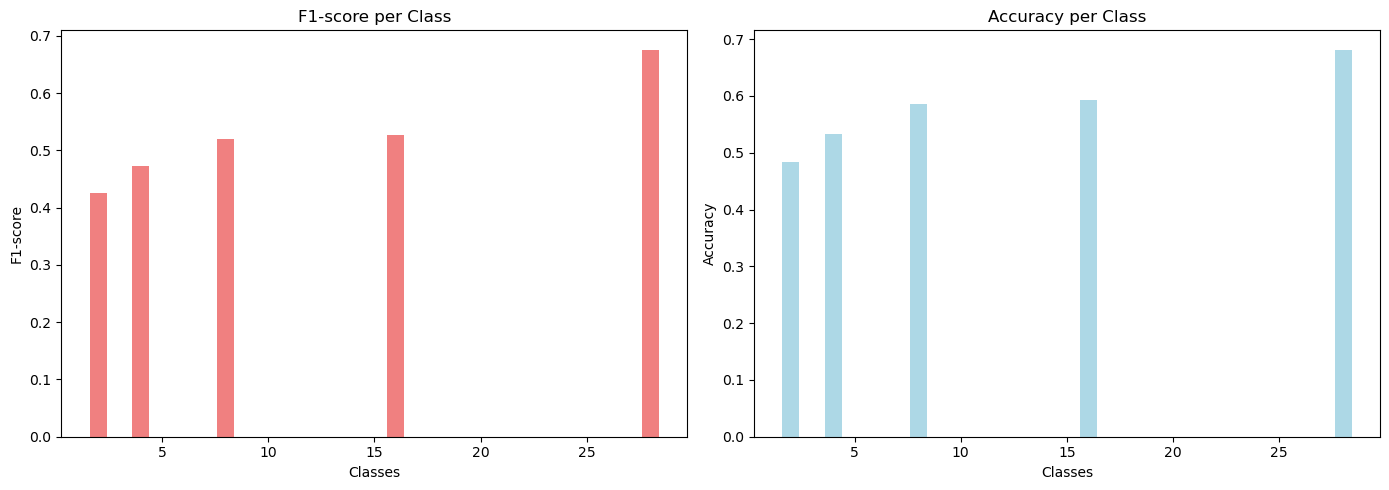

In [21]:
classes = list(f1_score_dict.keys())
f1_scores = list(f1_score_dict.values()) 
accuracies = list(accuracy_dict.values())  

# Создадим фигуру и оси для двух графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Построим график для f1-score
ax1.bar(classes, f1_scores, color='lightcoral')
ax1.set_xlabel('Classes')
ax1.set_ylabel('F1-score')
ax1.set_title('F1-score per Class')

# Построим график для accuracy
ax2.bar(classes, accuracies, color='lightblue')
ax2.set_xlabel('Classes')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy per Class')

# Показать графики
plt.tight_layout()
plt.show()

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [22]:
from sklearn.manifold import TSNE

### Your code is here

X_centered_50 = X_centered.head(5000)
y_50 = y.head(5000)

t_sne = TSNE(n_components=2).fit_transform(X_centered_50)

tsne_df = pd.DataFrame(t_sne, columns=['TSNE_1', 'TSNE_2'])
tsne_df['y'] = y_50.reset_index(drop=True)

tsne_df

,TSNE_1,TSNE_2,y
0,-20.442041,-67.620705,2
1,0.331790,-54.095238,2
2,6.100360,-4.375930,2
3,32.893223,-9.397637,3
4,17.306566,-44.176285,2
...,...,...,...
4995,-26.071875,-4.362158,2
4996,27.396019,-61.286121,2
4997,-0.891391,-17.525700,2
4998,-6.379004,21.248777,1


<Axes: xlabel='TSNE_1', ylabel='TSNE_2'>

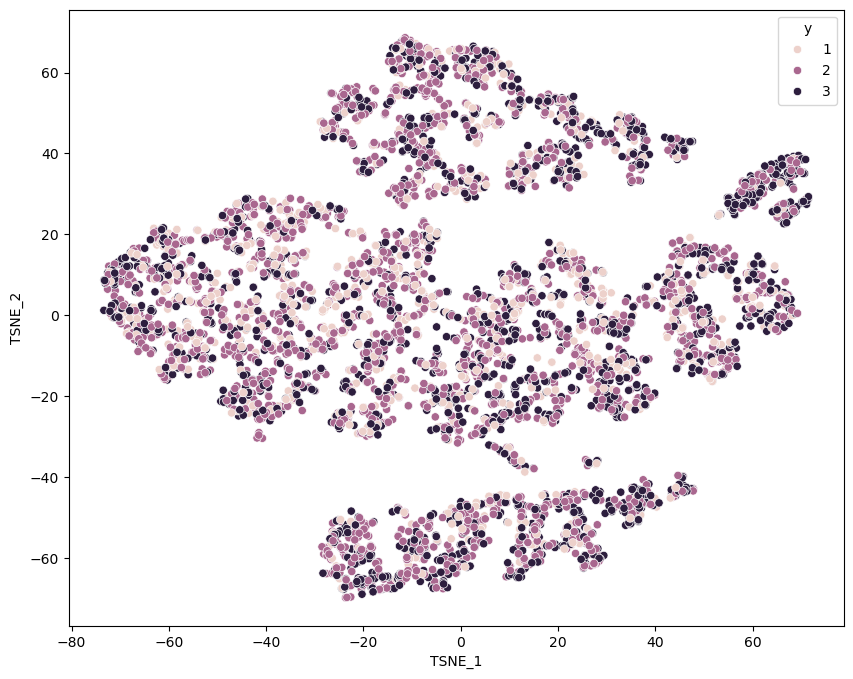

In [23]:
fig = plt.figure()

fig.set_size_inches(10, 8)

sns.scatterplot(data=tsne_df, x=tsne_df.TSNE_1, y=tsne_df.TSNE_2, hue=tsne_df.y)

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [29]:
### Your code is here


X_centered_50 = X_centered.head(1000)
y_50 = y.head(1000)

tsne_3d = TSNE(n_components=3).fit_transform(X_centered_50)

tsne_df_3d = pd.DataFrame(tsne_3d, columns=['TSNE_1',
                                           'TSNE_2',
                                           'TSNE_3'])

tsne_df_3d['y'] = y_50.reset_index(drop=True)

tsne_df_3d

,TSNE_1,TSNE_2,TSNE_3,y
0,-10.111661,-4.266975,3.359279,2
1,-5.801157,-3.883361,4.877509,2
2,-0.770163,-2.824379,0.440974,2
3,6.450386,-3.074302,-1.304272,3
4,4.561514,-0.542971,4.055743,2
...,...,...,...,...
995,-4.587257,-3.606228,-5.228835,2
996,14.299056,-0.280256,3.346985,2
997,-2.274280,1.703493,6.709816,3
998,-13.075894,-0.232499,0.669228,3


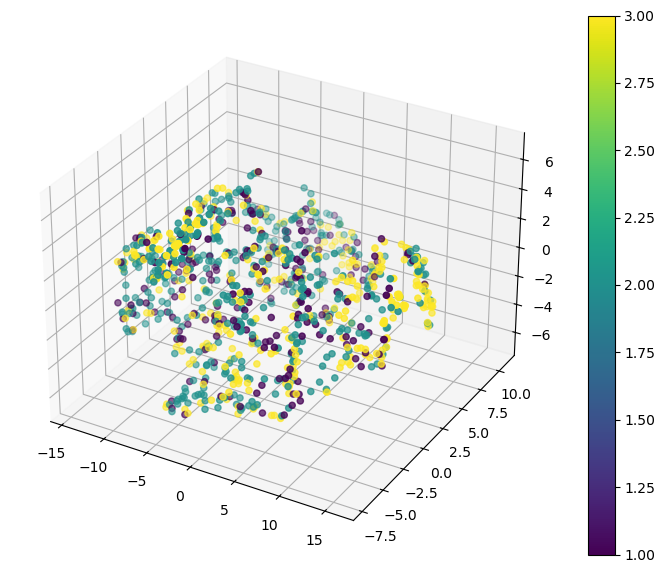

In [30]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(tsne_df_3d['TSNE_1'], tsne_df_3d['TSNE_2'], tsne_df_3d['TSNE_3'], c=y_50, cmap='viridis')

plt.colorbar(scatter)

plt.show()

Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!